## Obtenção dos Dados


In [47]:
# importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import statsmodels.api as sm



In [48]:
# importar o arquivo listings.csv para um DataFrame
df= pd.read_csv("C:/Users/lagma/Desktop/projetos/Data-Analytic-Airbnb-Porto/data/listings.csv")

In [49]:
# Verificando - Entrada e Variáveis
print("Entradas: ", df[df.columns[0]].count())
print("Variáveis: ", df.shape[1])

Entradas:  13657
Variáveis:  18


In [50]:
# Verificar as primeiras entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,14667447,Oporto - Paranhos,76561575,Nelson,PORTO,Paranhos,41.16886,-8.60254,Entire home/apt,NaN,2,0,NaN,NaN,1,0,0,NaN
1,17136811,"GAIA (OPORTO , PORTUGAL) - CENTER",109834431,Joana,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.11466,-8.60563,Private room,NaN,1,2,2017-04-21,0.02,1,0,0,NaN
2,17730260,Home sweet little home,12605401,Maria,PORTO,Paranhos,41.16795,-8.62140,Entire home/apt,NaN,3,92,2020-11-06,1.11,1,0,0,41045/AL
3,21027292,BedNShower EuroPorto,111401508,Adriano,PORTO,Bonfim,41.14755,-8.59364,Private room,NaN,1,0,NaN,NaN,2,0,0,NaN
4,23975787,Pretty Porto Apartment by SOULSHARING.PORTO,180330708,Jurjen,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15372,-8.60886,Entire home/apt,245.0,2,52,2024-02-25,0.72,1,243,12,66366/AL


### Limpeza e Preparação dos Dados


**Colunas relevantes para EDA e Machine Learning**

neighbourhood_group, neighbourhood: localização

room_type: tipo do quarto

price: valor da diária 

minimum_nights: mínimo de noites

number_of_reviews, reviews_per_month: popularidade

availability_365: dias disponíveis por ano

latitude, longitude: localização geográfica 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13657 entries, 0 to 13656
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13657 non-null  int64  
 1   name                            13657 non-null  object 
 2   host_id                         13657 non-null  int64  
 3   host_name                       13657 non-null  object 
 4   neighbourhood_group             13657 non-null  object 
 5   neighbourhood                   13657 non-null  object 
 6   latitude                        13657 non-null  float64
 7   longitude                       13657 non-null  float64
 8   room_type                       13657 non-null  object 
 9   price                           11932 non-null  float64
 10  minimum_nights                  13657 non-null  int64  
 11  number_of_reviews               13657 non-null  int64  
 12  last_review                     

 #### Quais são os tipos das variáveis

Converter as  colunas **´id ´** e **`host_id´** para o tipo strings, para evitar erros de interpretação.
Converter a coluna last_review para o tipo datetime pode ser útil para calcular a antiguidade do anúncio ou num futuro outras análises temporais.


In [52]:
# Conversões
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'])

# Para verificar o tipo após a conversão:
print(df['id'].dtype)
print(df['host_id'].dtype)
print(df['last_review'].dtype)


object
object
datetime64[ns]


In [53]:
# Verificar se o DataFrame  foi MODIFICADO!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13657 entries, 0 to 13656
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              13657 non-null  object        
 1   name                            13657 non-null  object        
 2   host_id                         13657 non-null  object        
 3   host_name                       13657 non-null  object        
 4   neighbourhood_group             13657 non-null  object        
 5   neighbourhood                   13657 non-null  object        
 6   latitude                        13657 non-null  float64       
 7   longitude                       13657 non-null  float64       
 8   room_type                       13657 non-null  object        
 9   price                           11932 non-null  float64       
 10  minimum_nights                  13657 non-null  int64         
 11  nu

In [54]:
# Verificar as primeiras entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,14667447,Oporto - Paranhos,76561575,Nelson,PORTO,Paranhos,41.16886,-8.60254,Entire home/apt,NaN,2,0,NaT,NaN,1,0,0,NaN
1,17136811,"GAIA (OPORTO , PORTUGAL) - CENTER",109834431,Joana,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.11466,-8.60563,Private room,NaN,1,2,2017-04-21,0.02,1,0,0,NaN
2,17730260,Home sweet little home,12605401,Maria,PORTO,Paranhos,41.16795,-8.62140,Entire home/apt,NaN,3,92,2020-11-06,1.11,1,0,0,41045/AL
3,21027292,BedNShower EuroPorto,111401508,Adriano,PORTO,Bonfim,41.14755,-8.59364,Private room,NaN,1,0,NaT,NaN,2,0,0,NaN
4,23975787,Pretty Porto Apartment by SOULSHARING.PORTO,180330708,Jurjen,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.15372,-8.60886,Entire home/apt,245.0,2,52,2024-02-25,0.72,1,243,12,66366/AL


#### Qual é a proporção de valores ausentes no conjunto de dados

In [55]:
# Verificar valores ausentes
print(df.isnull().sum())


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1725
minimum_nights                       0
number_of_reviews                    0
last_review                       1708
reviews_per_month                 1708
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            715
dtype: int64


Compreender a razão dos dados em falta é crucial para escolher a melhor estratégia de tratamento.

Aqui estão algumas razões comuns:

 - Erros na recolha de dados: Problemas técnicos, erros humanos durante a introdução dos dados ou falhas na integração de diferentes fontes de dados podem resultar em valores em falta.

 - Dados não aplicáveis: Em certos casos, os dados simplesmente não se aplicam a determinadas instâncias. Por exemplo, um novo anúncio pode ainda não ter avaliações.

 - Privacidade e segurança: Alguns utilizadores podem optar por não fornecer determinadas informações para proteger a sua privacidade.

 - Dados perdidos ou corrompidos: Durante a transmissão ou armazenamento, as informações podem ser perdidas ou corrompidas.

**`price:`** Depois de analisar achamos que a alternativa mais segura é substituir os valores em falta pela mediana, que é mais robusta a outliers, uma vez que ao utilizar a média pode ser influenciada por valores extremos (outliers).

In [56]:
# Calcular a mediana
mediana_price = df['price'].median()

# Mostrar o valor da mediana
print(f"Mediana do preço: {mediana_price}")

# Substituir os nulos com o valor da mediana
df['price'] = df['price'].fillna(mediana_price)


Mediana do preço: 72.0


**`license:`** Vamos supor que os valores que faltam são os anúncios não tem licença, vamos preencher com  "Não Licenciado

In [57]:
# Preencher os valores nulos com 'Não Licenciado'
df['license'] = df['license'].fillna('Não Licenciado')

# Verificar o resultado
print(df['license'].isnull().sum())
print(df['license'].value_counts())

0
license
Exempt            960
Não Licenciado    715
12345/AL           37
55201/AL           34
93125/AL           32
                 ... 
86331/AL            1
44704/AL            1
30910/AL            1
1345/AL             1
44007/AL            1
Name: count, Length: 8967, dtype: int64


O facto de a coluna **`last_review`** e a coluna **`reviews_per_month`** apresentarem o mesmo número de valores nulos (1708) sugere que a ausência de dados nestas colunas está interligada e, muito provavelmente, tem uma origem comum. 
Possíveis sugestões para tal fato:

**Anúncios Recentes:** Uma das razões com mais logicas é que estes 1708 anúncios sejam recentes e ainda não tenham recebido qualquer avaliação. Nestas situações, é expectável que não possuam uma data de **`last_review`** nem um valor atribuído a **`reviews_per_month`**.

**Anúncios sem Avaliações:** Alguns anúncios poderão não ter avaliações por opção do anfitrião ou porque os hóspedes não as deixaram.  
Podiamos removeros dados (1708 anúncios) mas como é uma quantidade bastante grande podia causar um bias no estudo.
**`reviews_per_month:`** Preencher com a coluna com 0, assumendo assim que a ausência de um valor indica que o anúncio não recebeu avaliações,o que a torna simples de implementar, e não distorce a média (já que a mediana é mais robusta).

**`last_review:`** Preencher com uma data padrão (ex: 1900-01-01), para indicar que não há avaliação disponível.



In [ ]:
import datetime
# Preencher valores nulos em 'reviews_per_month' com 0 (sem inplace)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Converter 'last_review' para datetime e preencher nulos com data padrão
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review'] = df['last_review'].fillna(datetime.datetime(1900, 1, 1))

#  Verificar se ainda existem valores nulos
print(f"Nulos em 'reviews_per_month': {df['reviews_per_month'].isnull().sum()}")
print(f"Nulos em 'last_review': {df['last_review'].isnull().sum()}")


Nulos em 'reviews_per_month': 0
Nulos em 'last_review': 0


In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64


In [ ]:
# Seleção das colunas relevantes
colunas = [
    "neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",
    "number_of_reviews", "reviews_per_month", "availability_365",
    "latitude", "longitude"
]
df = df[colunas]
# Estatísticas descritivas (apenas colunas numéricas)
df.describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,latitude,longitude
count,13657.0,13657.00,13657.00,13657.00,13657.00,13657.00,13657.00
mean,89.3,3.84,57.71,1.38,214.62,41.15,-8.61
std,96.7,30.65,90.07,1.55,120.07,0.07,0.06
min,10.0,1.00,0.00,0.00,0.00,40.77,-8.78
25%,55.0,1.00,3.00,0.18,124.00,41.14,-8.62
50%,72.0,2.00,20.00,0.82,250.00,41.15,-8.61
75%,95.0,2.00,73.00,2.11,317.00,41.16,-8.60
max,5000.0,1125.00,899.00,13.50,365.00,41.46,-8.15


A tabela mostra alguns outliers bem evidentes, especialmente em variáveis como:

**`minimum_nights`** → valor máximo de 1125 noites (mais de 3 anos!)

**`number_of_reviews`** → chega a 899 (muito acima da média de ~58)

**`reviews_per_month`** → tem até 13.5, o que é alto considerando que são no máximo 12 meses

**`availability_365`** → embora vá até 365, muitos valores são bem abaixo (inclusive 0)

 #### Limpar outliers e  preparar os dados 

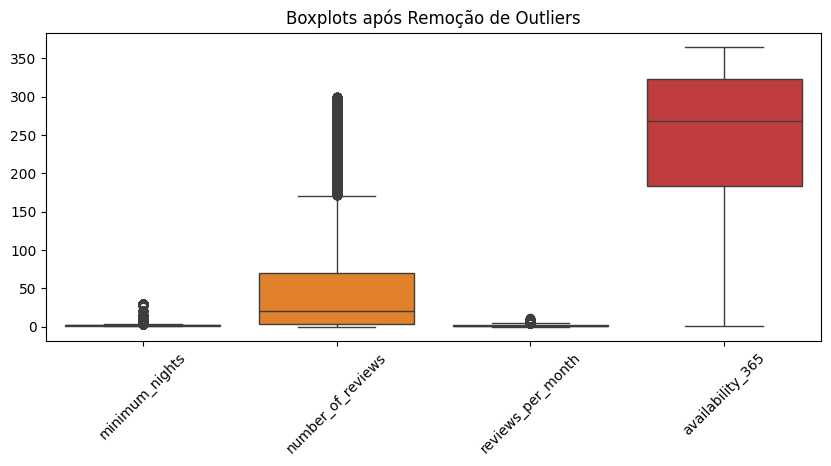

In [ ]:
# Colunas relevantes
colunas = [
    "minimum_nights", "number_of_reviews", "reviews_per_month",
    "availability_365"
]

# Remover valores ausentes
df.dropna(inplace=True)

# Filtrar preços já ajustados entre 10 e 500 (passo anterior)
df = df[df["price"].between(10, 500)]

# Limpeza de outliers com regras de negócio / IQR

# minimum_nights <= 30 (1 mês)
df = df[df["minimum_nights"] <= 30]

# number_of_reviews <= 300
df = df[df["number_of_reviews"] <= 300]

# reviews_per_month <= 12
df = df[df["reviews_per_month"] <= 12]

# availability_365 > 0
df = df[df["availability_365"] > 0]

# Resetar índice após filtros
df.reset_index(drop=True, inplace=True)

# Visualizar boxplot pós-limpeza
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[["minimum_nights", "number_of_reviews", "reviews_per_month","availability_365"]])
plt.title("Boxplots após Remoção de Outliers")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Verificar estatísticas finais
df.describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,latitude,longitude
count,11542.00,11542.00,11542.00,11542.00,11542.00,11542.00,11542.00
mean,86.80,2.35,49.36,1.37,245.13,41.15,-8.61
std,58.73,3.41,64.76,1.47,95.40,0.07,0.06
min,10.00,1.00,0.00,0.00,1.00,40.77,-8.78
25%,54.00,1.00,3.00,0.22,183.00,41.14,-8.62
50%,72.00,2.00,21.00,0.90,268.00,41.15,-8.61
75%,99.00,2.00,70.00,2.06,323.00,41.16,-8.60
max,500.00,30.00,300.00,10.79,365.00,41.46,-8.15


"Este conjunto de boxplots ilustra a distribuição das variáveis depois de eliminarmos os valores atípicos, recorrendo a critérios definidos com base no conhecimento do negócio.
A análise individual de cada variável revela o seguinte:

*   **`minimum_nights`:** A grande maioria das estadias mínimas concentra-se entre 1 e 7 noites. Embora ainda existam alguns valores atípicos, o seu impacto é agora menor. Decidimos manter valores até 30 noites, o que nos parece razoável para o mercado do Airbnb.
*   **`number_of_reviews`:** A distribuição é assimétrica, com muitos anúncios a apresentarem poucos comentários (0-100) e alguns com um número consideravelmente superior. Removemos os valores mais extremos, mas mantivemos anúncios com até 300 avaliações, pois consideramos que estes valores são aceitáveis e informativos. 
*   **`reviews_per_month`:** A maior parte dos anúncios recebe menos de 5 avaliações por mês. Embora ainda surjam alguns valores atípicos, conseguimos reduzir a cauda da distribuição, excluimos valores superiores a 12, o que ajuda a limitar exageros.
*   **`availability_365`:** A distribuição revela que muitos imóveis estão altamente disponíveis (próximos de 365 dias por ano). Não se identificam valores atípicos visíveis, apenas variação legítima. Mantivemos apenas os imóveis com disponibilidade superior a 0 dias.


 ### Análise Exploratória (EDA):
#### Exploração Mais Aprofundada

 #### Qual o tipo de distribuição das variáveis?

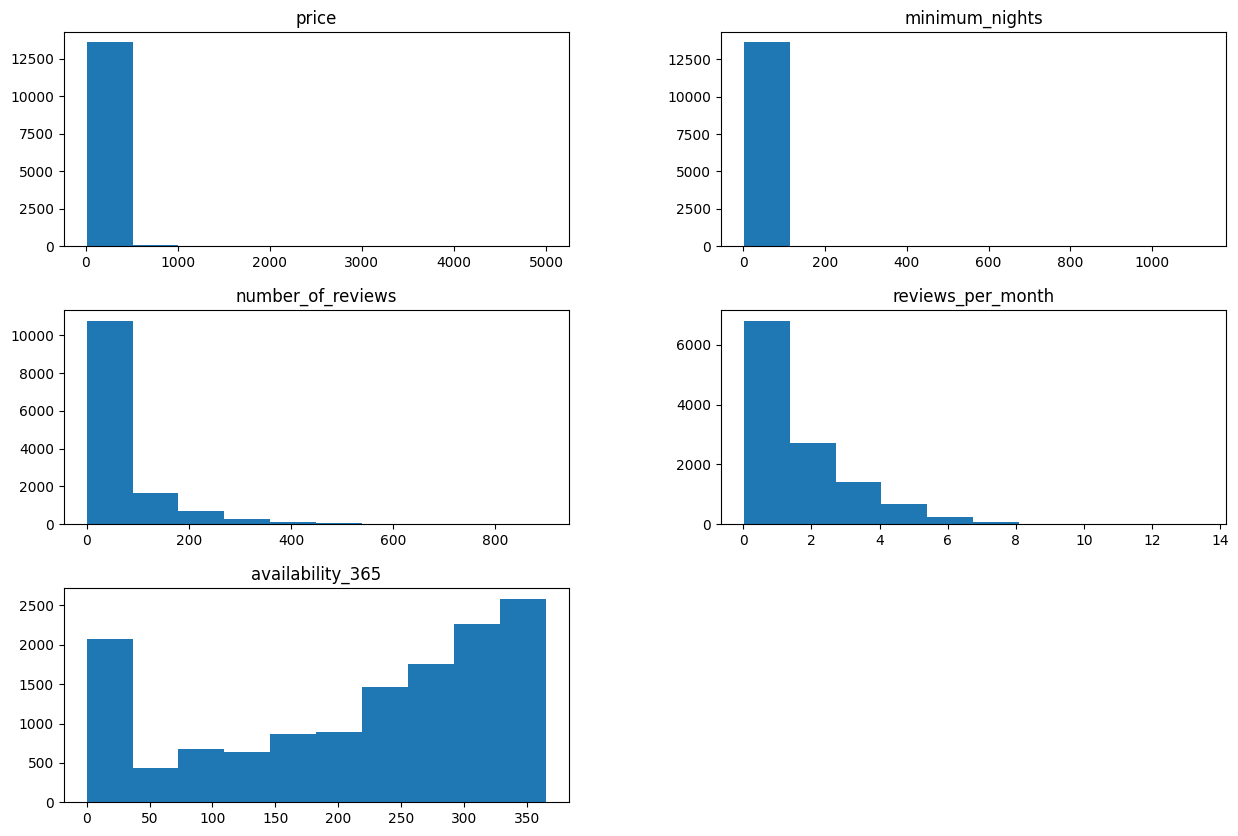

In [ ]:
# plotar o histograma das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].hist(figsize=(15,10), grid=False);
     

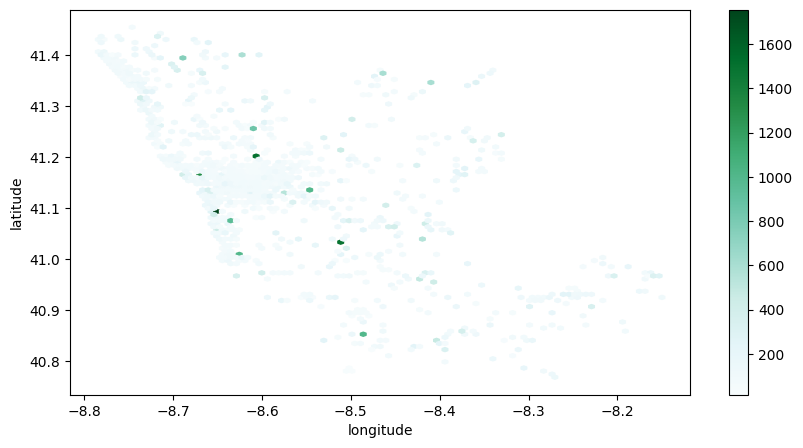

In [ ]:
# plotar gráfico hexabinário
df.plot.hexbin(x = 'longitude', y='latitude', C='price', figsize=(10,5));

#### Qual a distribuição dos preços

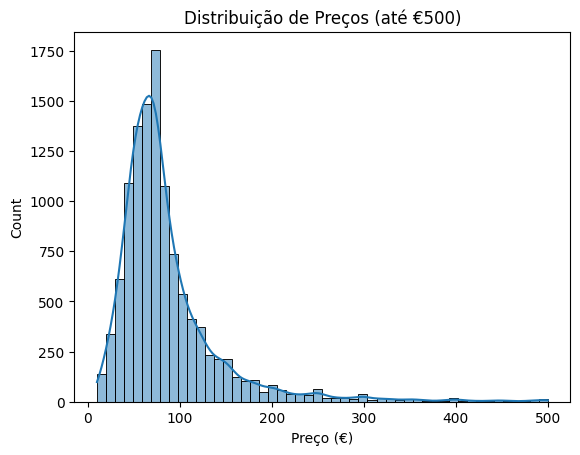

In [ ]:
# Distribuição dos preços
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribuição de Preços (até €500)")
plt.xlabel("Preço (€)")
plt.show()

A distribuição dos preços reflete um padrão comum no mercado de arrendamento:uma assimetria à direita, o que significa que encontramos muitos alojamentos com preços mais convidativos e menos opções para quem procura algo mais exclusivo e dispendioso.
A grande maioria dos alojamentos concentra-se numa faixa de preço bastante acessível, entre os 30 e os 100 euros por noite.
A partir dos 150 euros, notamos que a oferta começa a rarear, indicando que preços acima deste valor são menos frequentes no mercado.

### Qual o preço por Tipo de Quarto"

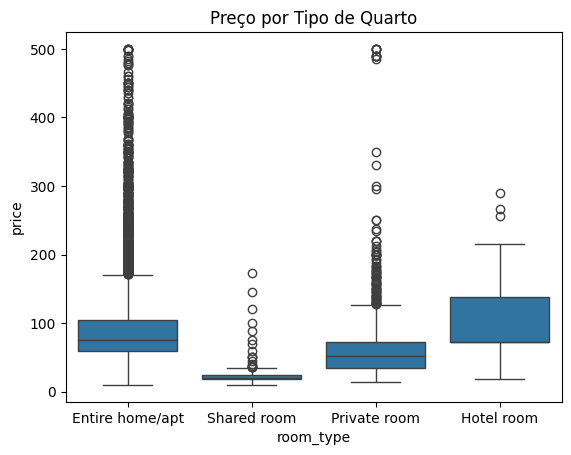

In [ ]:
# Boxplot por tipo de quarto
sns.boxplot(x="room_type", y="price", data=df)
plt.title("Preço por Tipo de Quarto")
plt.show()

Analisando os dados, percebemos que o tipo de alojamento tem um impacto notório no preço. Os **Entire home/apt** (casas/apartamentos inteiros) destacam-se com a mediana mais alta e uma grande variação de preços, sugerindo que esta categoria abrange desde opções confortáveis e acessíveis a imóveis de luxo. Em contrapartida, os **Shared room** (quartos partilhados) e os **Private room** (quartos privados) apresentam preços significativamente mais baixos, sendo os quartos partilhados a opção mais económica para quem procura poupar. Curiosamente, os **Hotel room** (quartos de hotel) surgem com menos amostras, mas com preços relativamente elevados. É também importante referir que encontramos outliers (preços atípicos) com alguma frequência em todas as categorias, especialmente nos "Entire home/apt".

### Qual o preço médio por bairro 

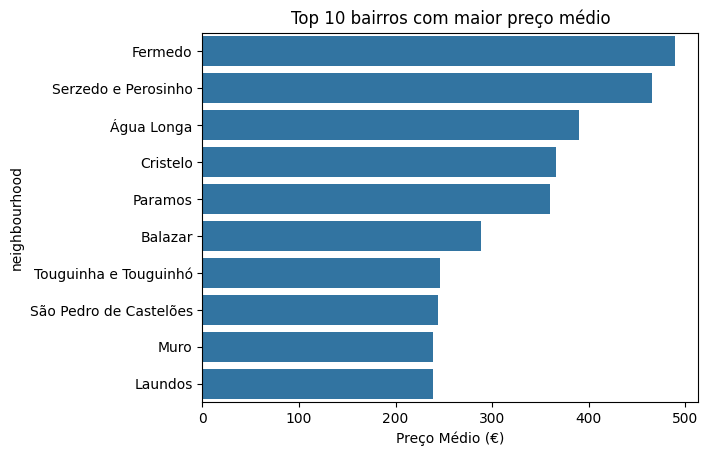

In [ ]:
# Preço médio por bairro (top 10)
top_bairros = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_bairros.values, y=top_bairros.index)
plt.title("Top 10 bairros com maior preço médio")
plt.xlabel("Preço Médio (€)")
plt.show()

O bairro onde o imóvel se encontra tem um impacto significativo no preço, provavelmente devido à localização, ao tipo de propriedade disponível ou ao perfil turístico da zona. Os Bairros como Fermeedo, Serzedo e Perosinho, assim como Água Longa, destacam-se com os preços médios mais elevados.

#### Qual a distribuição dos preços por bairro

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
"AVer-o-Mar, Amorim e Terroso",55.0,108.00,59.99,20.0,73.50,95.0,125.00,290.0
Agrela,2.0,71.50,30.41,50.0,60.75,71.5,82.25,93.0
Aguiar de Sousa,9.0,89.33,37.75,50.0,60.00,90.0,105.00,170.0
Aguçadoura e Navais,16.0,109.56,54.56,23.0,77.50,105.0,121.25,237.0
"Aldoar, Foz do Douro e Nevogilde",195.0,111.31,79.43,28.0,65.00,83.0,124.50,450.0
...,...,...,...,...,...,...,...,...
Vilela,6.0,158.67,121.97,89.0,97.00,98.0,152.25,400.0
Várzea,1.0,130.00,NaN,130.0,130.00,130.0,130.00,130.0
Água Longa,1.0,390.00,NaN,390.0,390.00,390.0,390.00,390.0


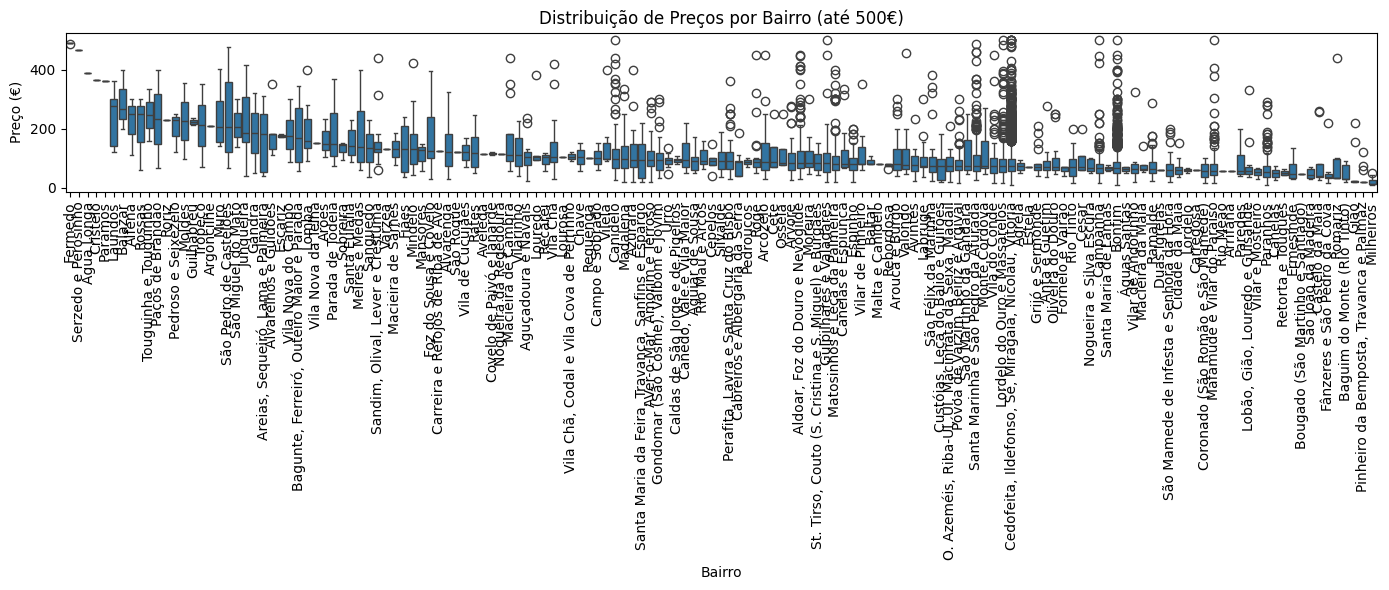

In [ ]:
# Agrupar por bairro e calcular estatísticas descritivas
precos_por_bairro = df.groupby('neighbourhood')['price'].describe().round(2)

# Mostrar as estatísticas por bairro
display(precos_por_bairro)

# Visualizar a distribuição dos preços por bairro com boxplot
plt.figure(figsize=(14, 6))
ordem = df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='neighbourhood', y='price', order=ordem)
plt.xticks(rotation=90)
plt.title("Distribuição de Preços por Bairro (até 500€)")
plt.ylabel("Preço (€)")
plt.xlabel("Bairro")
plt.tight_layout()
plt.show()

A análise da distribuição por bairro ajuda a identificar regiões premium e regiões econômicas.

Com isso, pode-se segmentar o mercado, ajustar preços ou até prever o preço com base na localização.
**Fermedo, Serzedo e Perosinho, Água Longa, Cristelo, Paramos:**  A média de preços nestes bairros esta acima dos 300€ sugere a predominância de propriedades de alto padrão, como casas completas com comodidades de luxo, situadas em zonas onde a procura turística é mais intensa, a centralidade é inegável ou o valor imobiliário é simplesmente superior. 

**Paços de Brandão, Laundos, Muro:**  . É provável que a distância face aos pontos de maior interesse ou a menor procura turística se traduzam em preços mais convidativos.


In [ ]:
pip install statsmodels


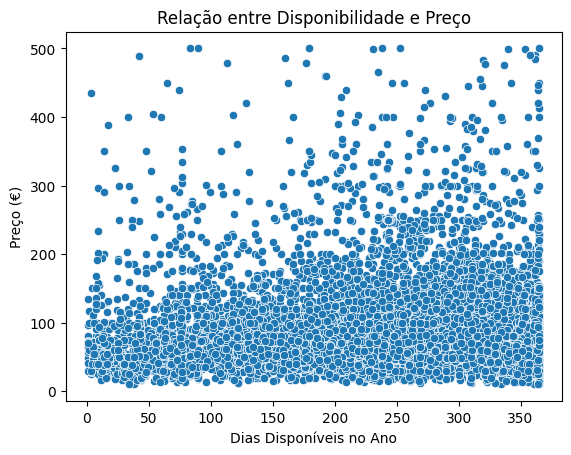

In [ ]:
# Gráfico de dispersão
sns.scatterplot(data=df, x='availability_365', y='price')
plt.title("Relação entre Disponibilidade e Preço")
plt.xlabel("Dias Disponíveis no Ano")
plt.ylabel("Preço (€)")
plt.show()

# Regressão linear simples
X = df['availability_365']
y = df['price']

# Adiciona constante para o modelo (termo independente)
X_const = sm.add_constant(X)



In [ ]:

# Modelo de regressão
modelo = sm.OLS(y, X_const).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.92
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           0.000327
Time:                        19:07:28   Log-Likelihood:                -63381.
No. Observations:               11542   AIC:                         1.268e+05
Df Residuals:                   11540   BIC:                         1.268e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               81.7538      1.507  

O coeficiente de determinação (R-quadrado) é extremamente baixo: 0,001. Isto significa que apenas 0,1% da variação no preço é explicada pela disponibilidade, o que indica um modelo muito fraco.
A variável "availability_365" é estatisticamente significativa (p-valor = 0,000), com um coeficiente de 0,0206. Isto sugere que por cada dia adicional de disponibilidade, o preço aumenta em média 0,0206 unidades.
O teste F é significativo (F = 12,92, p-valor = 0,000327), o que indica que o modelo como um todo é estatisticamente significativo, apesar do baixo poder explicativo.
O modelo apresenta problemas de normalidade dos resíduos, evidenciados pelos valores elevados de assimetria (Skew = 2,901) e curtose (Kurtosis = 14,985), bem como pelo teste de Jarque-Bera significativo.
O teste de Durbin-Watson (1,917) está próximo de 2, o que sugere ausência de autocorrelação de primeira ordem nos resíduos.

In [62]:
# Regressão: cria dummies e garante que os dados estão numéricos e sem NaN
X = pd.get_dummies(df['room_type'], drop_first=True)
X = X.astype(float)  # força as colunas a serem float
X_const = sm.add_constant(X)



modelo_room = sm.OLS(y, X_const).fit()
print(modelo_room.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     105.0
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           3.22e-67
Time:                        15:57:39   Log-Likelihood:                -81657.
No. Observations:               13657   AIC:                         1.633e+05
Df Residuals:                   13653   BIC:                         1.634e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           95.6053      0.912    104.824   

### Correlação

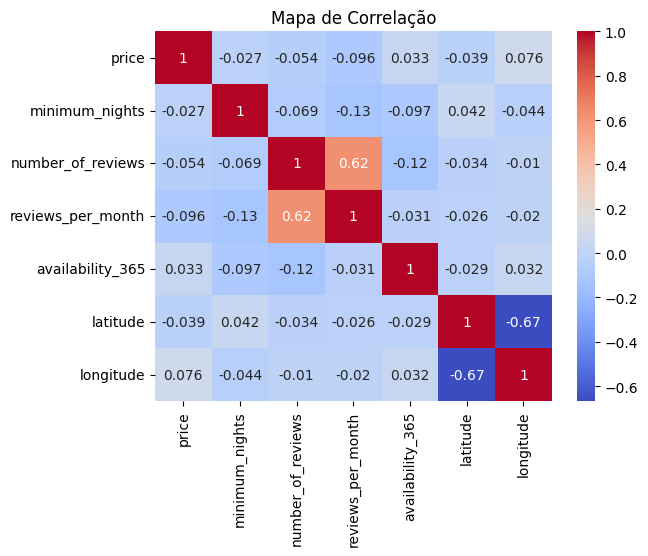

In [ ]:
# Correlação entre variáveis numéricas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação")
plt.show()

Apesar de o preço não apresentar uma correlação forte com nenhuma variável numérica isoladamente, isso não impede que possa ser previsto com um modelo multivariado, especialmente ao considerar variáveis categóricas como o tipo de quarto e o bairro. A fraca correlação com as variáveis numéricas sugere que nenhuma delas, por si só, consegue explicar bem a variação dos preços. Para criar um modelo eficaz, será crucial combinar estas variáveis categóricas com variáveis contínuas.

### Teste de Hipoteses

### Testar hipóteses sobre preço em relação a tipo de quarto e bairro
H₀ (nula): As distribuições de preço são iguais entre os tipos de quarto.

H₁ (alternativa): Pelo menos um tipo de quarto tem distribuição de preço diferente.

In [ ]:
# Objetivo: Testar hipóteses sobre preço em relação a tipo de quarto e bairro
from scipy.stats import kruskal

print("\nHIPÓTESE: Diferença de preços entre tipos de quarto")
tipos = df["room_type"].unique()
grupo_quartos = [df[df["room_type"] == tipo]["price"] for tipo in tipos]
stat1, pval1 = kruskal(*grupo_quartos)
print(f"Estatística: {stat1:.2f}, p-valor: {pval1:.4f}")

if pval1 < 0.05:
    print("Resultado: Rejeitamos H0. Existe diferença significativa entre os tipos de quarto.")
else:
    print("Resultado: Não rejeitamos H0. Não há evidência de diferença significativa entre os tipos de quarto.")





HIPÓTESE: Diferença de preços entre tipos de quarto
Estatística: 1468.75, p-valor: 0.0000
Resultado: Rejeitamos H0. Existe diferença significativa entre os tipos de quarto.


Com um p-valor de 0.0000, rejeitamos a hipótese nula e aceitamos a hipótese alternativa, o que confirma que os preços dos quartos variam significativamente consoante o tipo de quarto.